[View in Colaboratory](https://colab.research.google.com/github/lozuwa/dojo_machine_learning_emi/blob/master/Lectura_2_Problema_regresion_lineal_Rodrigo_Loza.ipynb)

<h1>Regresion lineal</h1>
<h2>Por: Rodrigo Loza</h2>

# Sección nueva

In [0]:
# Numerical and tensor manipulations.
import numpy as np
# Visualizations.
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
# Things look nicer with this configuration.
%config InlineBackend.figure_format = 'retina'

<h1>Machine learning</h1>
<strong>Definición: </strong>"Machine learning es la ciencia que le permite a las computadoras aprender a resolver un problema sin ser explicitamente programadas."

<p>De manera específica, Machine learning utiliza un estimador frequentista para aprender. Este estimador es conocido como <strong>Maximum likelihood estimator</strong>, el cual define una función parametrica que maximiza la probabilidad de que una variable se adecue a una distribucion de probablididad. </p>

<h3>Likelihood function</h3>
$$ L(\theta) = \prod_{i=1}^{M} p(x_i | \theta) $$

<h3>Maximizar log likelihood</h3>
$$ \theta = argmax_{\theta}(ln(L(\theta))) $$

<h3>Funcion parametrica</h3>
$$ f(x;\theta) = \sum_{j=1}^{N} \theta_j X_j $$

<p> De esta manera obtenemos un estimador de parametros como se muestra en <strong>Maximizar log likelihood</strong>. Para encontrar el parametro theta podemos solucionar analiticamente despejando theta. Sin embargo, no siempre es posible encontrar theta, por tanto, recurrimos a resolver el problema con un problema iterativo de optimizacion. En este sentido, supongamos que decidimos utilizar <strong>batch gradient descent</strong>, pero aun hay un componente que nos falta para aplicar este algoritmo. </p>

<h3>Batch gradient descent</h3>
Repeat {
$$ \theta = \theta - \alpha * \frac{\partial{J(\theta)}}{\partial{\theta}} $$
}
<br>
Dónde alpha es el coeficiente de aprendizaje, J(theta)/theta es la derivada de la función costo.

<p> Este ingrediente es una funcion costo que nos permita tener control de nuestra optimizacion. Para encontrar esta funcion costo, debemos asumir que una distribucion normal gobierna el modelo estadistico y que la media del mismo es la funcion parametrica, la cual eventualmente, replicará la distribucion de datos del problema. Por tanto, si aplicamos nuevamente <strong>maximum likelihood estimation (MLE)</strong> y despejamos theta, obtenemos una funcion costo.</p>

<h3>Funcion costo derivada de MLE</h3>
$$ J(theta) = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{i};theta) - y^{i})^2 $$

<h2>Resumen</h2>
En resumen <strong>Machine learning</strong> esta compuesta por 3 ingredientes base:
<ol>
    <li><strong>Hipótesis:</strong> f(x;theta)</li>
    <li><strong>Función costo:</strong> J(theta)</li>
    <li><strong>Algoritmo de optimización:</strong> Batch gradient descent.</li>
</ol>

<h2>Regresión lineal</h2>
<p>Veamos un ejemplo para recordar la anterior clase.</p>

<br>
<h3>Problema</h3>
<p>Dada una distribucion de probabilidad conjunta p(x,y), utilizar machine learning para crear un modelo que pueda predecir la distribución p(x,y).</p>

<p>La distribución de probabilidad conjunta p(x,y) esta descrita por la siguiente función:</p>
$$ f(x) = \sin(2 \pi x) $$


<h2>Base de datos</h2>
Definamos la base de datos.

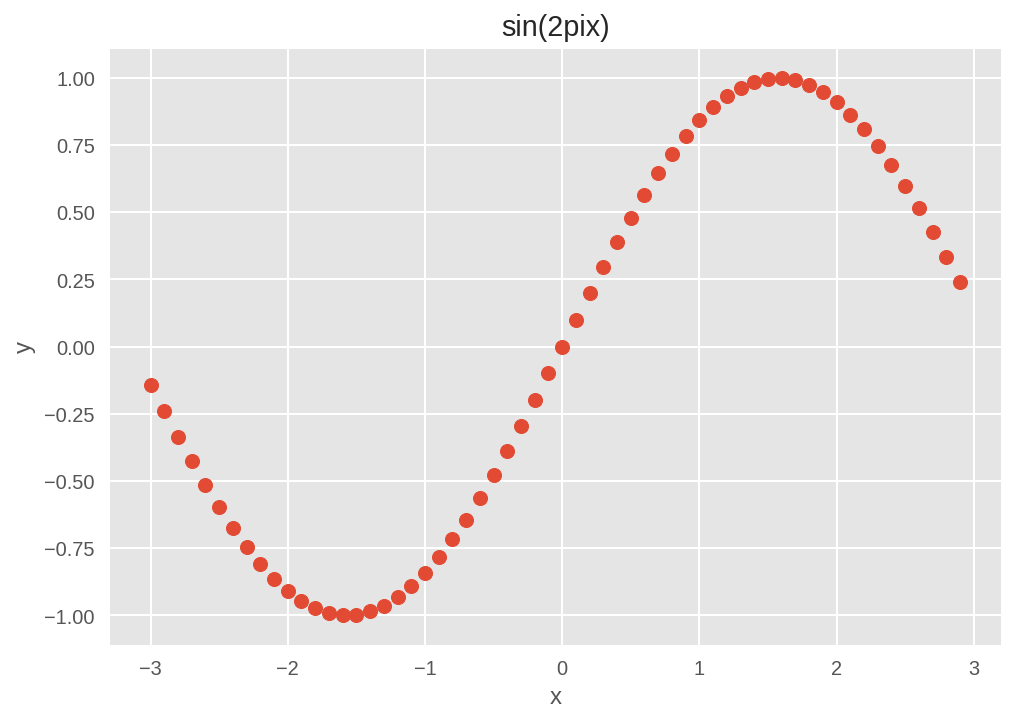

In [2]:
x = np.arange(-3, 3, 0.1)
y = [np.sin(i) for i in x]
plt.scatter(x, y)
plt.title("sin(2pix)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h2>Hipótesis</h2>
Definamos la hipotesis. Primero debemos inicializar los pesos theta, luego definimos la funcion parametrica. 

In [3]:
theta = np.array(np.random.rand()).reshape(1, 1)
theta

array([[0.63846384]])

In [0]:
x = x.reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
# print(x)
# print('-----')
# print(y)

In [0]:
h_theta_x = np.dot(x, theta)
#print(h_theta_x)

<p>Visualizemos h_theta_x y comparemos con p(x, y)</p>

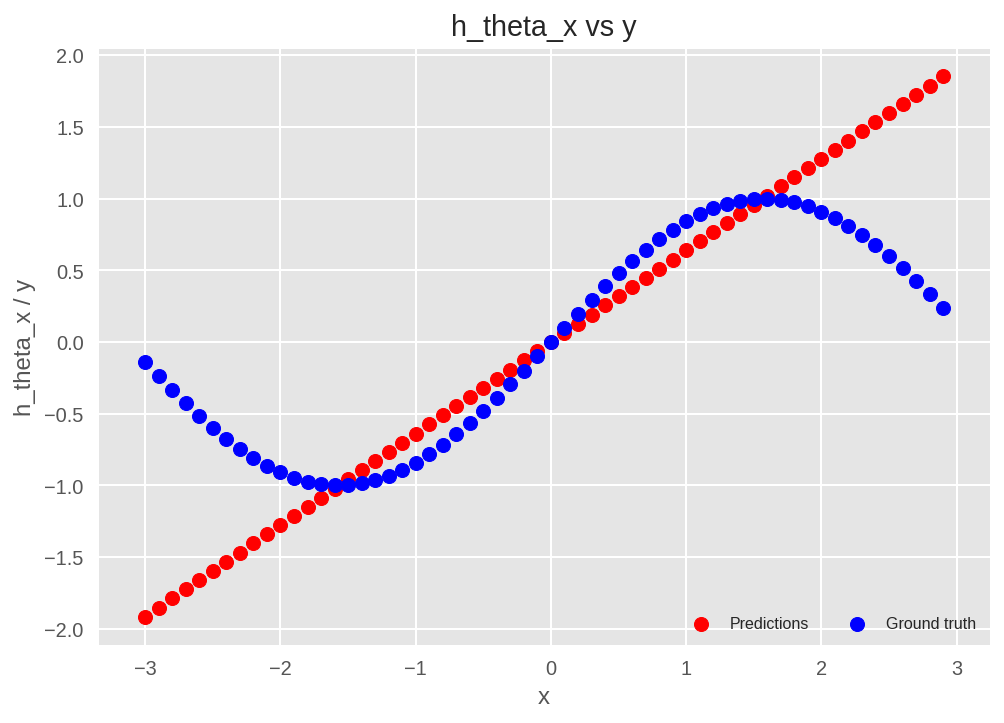

In [6]:
predictions = plt.scatter(x, h_theta_x, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("h_theta_x vs y")
plt.xlabel("x")
plt.ylabel("h_theta_x / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<p>Si analizamos h_theta_x podemos ver que la hipotesis no tiene la forma que deseamos. Nuestra hipotesis no esta entrenada. Continuemos programando los 2 ingredientes restantes.
<br>
<h2>Funcion costo</h2>
Definamos la funcion costo:
$$ J(theta) = \frac{1}{2m} \sum_{i=1}^{m} (f(x^{i};theta) - y^{i})^2 $$

In [0]:
def cost_function(x = None, y = None, h_theta_x = None, deriv = None):
    # Local variables.
    if (deriv == None):
        deriv = False
    m = x.shape[0]
    # Logic.
    if (deriv):
        j_theta = (1/(2*m))*np.dot(x.T, (h_theta_x - y))
    else:
        j_theta = (1/(2*m))*np.sum((h_theta_x - y)**2)
    return j_theta

<h2>Algoritmo de optimizacion</h2>
Batch gradient descent.
<br>
Repeat {
$$ \theta = \theta - \alpha * \frac{\partial{J(\theta)}}{\partial{\theta}} $$
}

In [0]:
def bgd(theta = None, x = None, y = None, learning_rate = None, epochs = None):
    # Local variables.
    history_cost_function = []
    # Iterate over epochs.
    for i in range(epochs):
        # Define a local hypothesis.
        h_theta_x = np.dot(x, theta)
        # Update theta.
        theta = theta - learning_rate * cost_function(x = x, y = y, h_theta_x = h_theta_x, deriv = True)
        # Have a record of our progress.
        history_cost_function.append(cost_function(x = x, y = y, h_theta_x = h_theta_x, deriv = False))
    # Return trained values.
    return theta, history_cost_function

<h2>EJERCICIO 1</h2>
<p>Reemplazar los valores <strong>learning_rate</strong> y <strong>epochs</strong> hasta encontrar la mejor funcion que pueda predecir los datos del problema. Una vez que hayas corrido la siguiente celda, visualiza tus resultados con las siguientes dos celdas. Las cuales te mostraran el progreso de tu funcion costo y el resultado del aprendizaje comparado con los datos del problema. </p> 
<p><strong>NOTA:</strong> Te recomiendo probar con los siguientes rangos.</p>
<ol>
    <li><strong>Learning rate:</strong> 0.001 - 0.1</li>
    <li><strong>Epochs:</strong>10 - 1000</li>
</ol>

In [0]:
# NOTA: Reemplaza las siguientes variables.
learning_rate =  # ESCRIBE AQUI TU VALOR
epochs =  # ESCRIBE AQUI TU VALOR
# Entrenar algoritmo.
theta_trained, hist_cf = bgd(theta = theta, x = x, y = y, learning_rate = learning_rate, epochs = epochs)

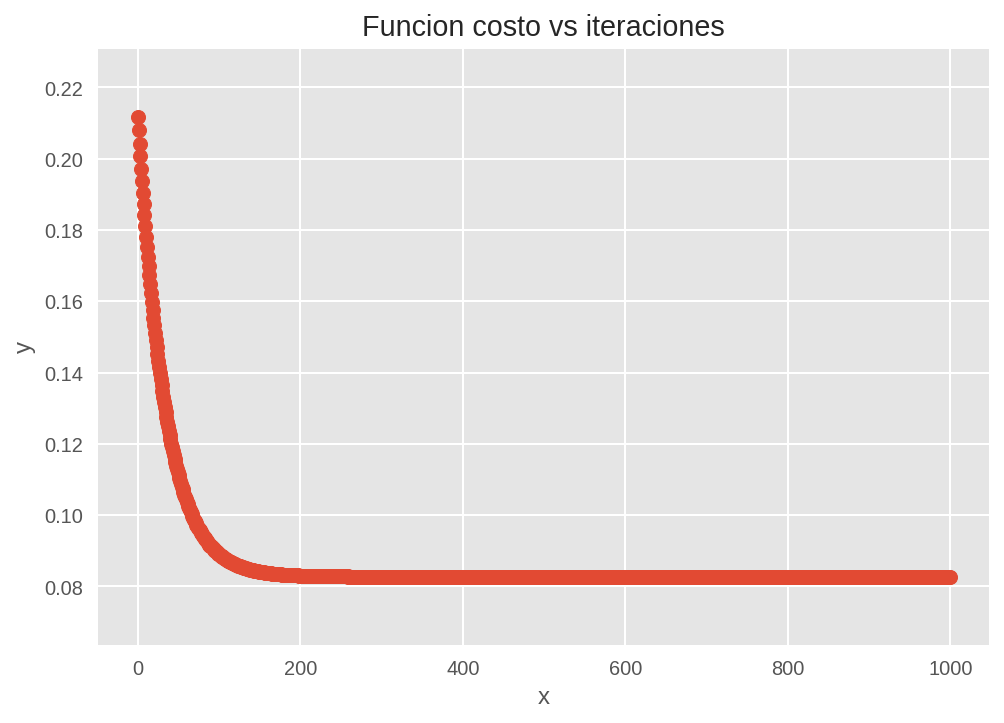

In [10]:
# Plot cost function history.
# print(theta_trained)
# print(hist_cf)
plt.scatter([i for i in range(len(hist_cf))], hist_cf)
plt.title("Funcion costo vs iteraciones")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

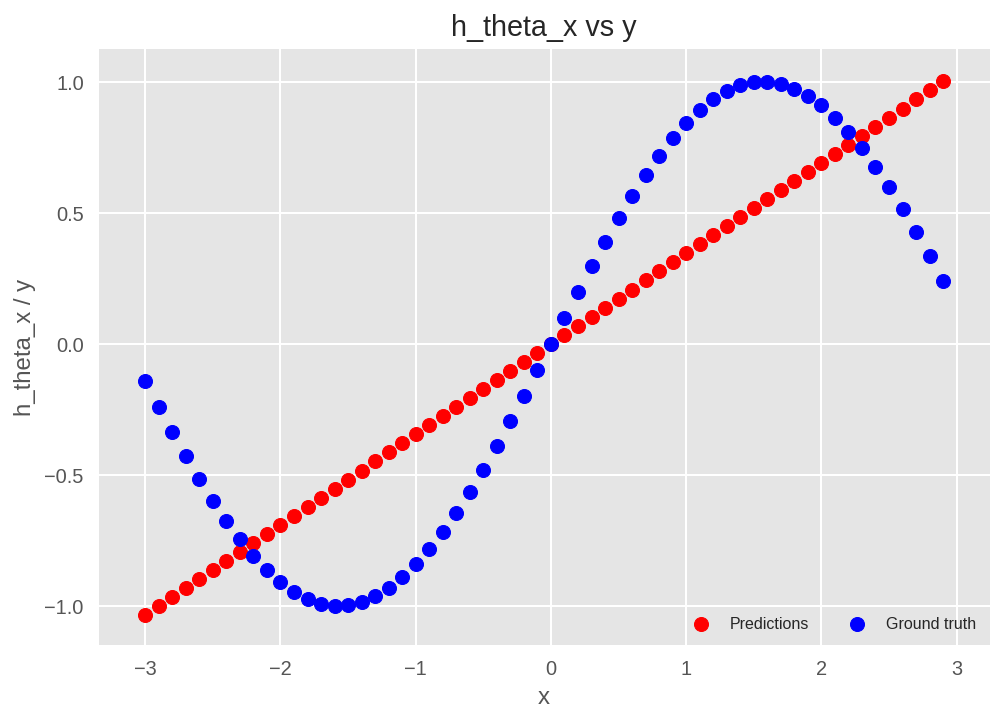

In [11]:
# Veamos la prediccion.
h_theta_x = np.dot(x, theta_trained)
predictions = plt.scatter(x, h_theta_x, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("h_theta_x vs y")
plt.xlabel("x")
plt.ylabel("h_theta_x / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<p>Como se puede ver en el grafico anterior. El modelo no tiene la <strong>capacidad</strong> de replicar la distribucion de datos p(x,y) porque f(x;theta) solo tiene la capacidad de producir una funcion lineal f(x) = x</p>

<h3>Como solucionamos este problema?</h3>
<p>Hint: Cómo es una funcion polinómica?</p>

<h3>Solucion: Incrementar el grado del polinomio de la funcion parametrica y de la base de datos.</h3>

In [12]:
# Incrementar el numero de parametros en la base de datos.
x2 = np.c_[x, x**2, x**3]
print(x2.shape)

(60, 3)


In [0]:
# Incrementar el numero de parametros en la funcion parametrica.
theta2 = np.array(np.random.rand(3)).reshape(-1, 1)

<h2>EJERCICIO 2</h2>
<p>Reemplazar los valores <strong>learning_rate</strong> y <strong>epochs</strong> hasta encontrar la mejor funcion que pueda predecir los datos del problema. Una vez que hayas corrido la siguiente celda, visualiza tus resultados con las siguientes dos celdas. Las cuales te mostraran el progreso de tu funcion costo y el resultado del aprendizaje comparado con los datos del problema. </p> 
<p><strong>NOTA:</strong> Te recomiendo probar con los siguientes rangos.</p>
<ol>
    <li><strong>Learning rate:</strong> 0.001 - 0.1</li>
    <li><strong>Epochs:</strong>10 - 1000</li>
</ol>

In [0]:
# NOTA: Reemplaza las siguientes variables.
learning_rate =  # ESCRIBE AQUI TU VALOR
epochs =  # ESCRIBE AQUI TU VALOR
# Corre el entrenamiento.
theta_trained2, hist_cf2 = bgd(theta = theta2, x = x2, y = y, learning_rate = learning_rate, epochs = epochs)

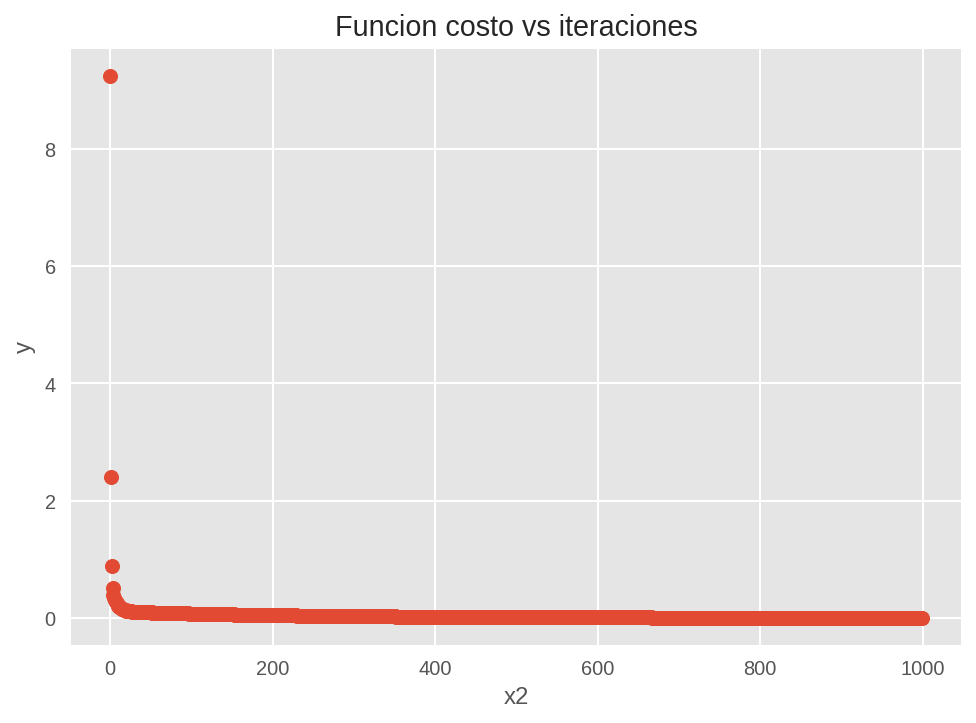

In [15]:
# Plot cost function history.
plt.scatter([i for i in range(len(hist_cf2))], hist_cf2)
plt.title("Funcion costo vs iteraciones")
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

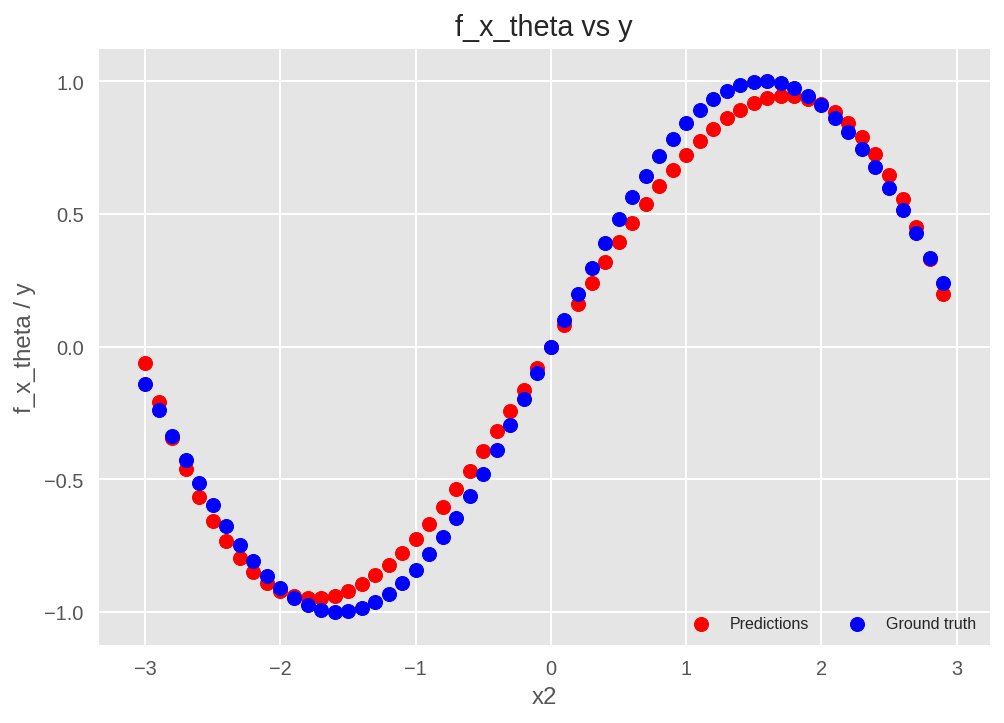

In [16]:
# Veamos la prediccion.
h_theta_x2 = np.dot(x2, theta_trained2)
predictions = plt.scatter(x, h_theta_x2, c = "r")
ground_truth = plt.scatter(x, y, c = "b")
plt.title("f_x_theta vs y")
plt.xlabel("x2")
plt.ylabel("f_x_theta / y")
plt.legend((predictions, ground_truth),
           ('Predictions', 'Ground truth'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)
plt.show()

<p>Si lo lograste hasta aqui, muy bien! Ahora resolvamos otro problema.</p>
<br>
<h2>Problema</h2>
<p>La base de datos es una función or. Esto quiere que los valores de entrada y salida son discretos. Crea un modelo estadistico utilizando machine learning para predecir los valores de salida de esta distribucion de datos.</p>

<h3>Base de datos</h3>
<p>Visualizemos la función xor.</p>

In [17]:
# Datos.
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0,1,1,1]]).T
print(x.shape, y.shape)

(4, 2) (4, 1)


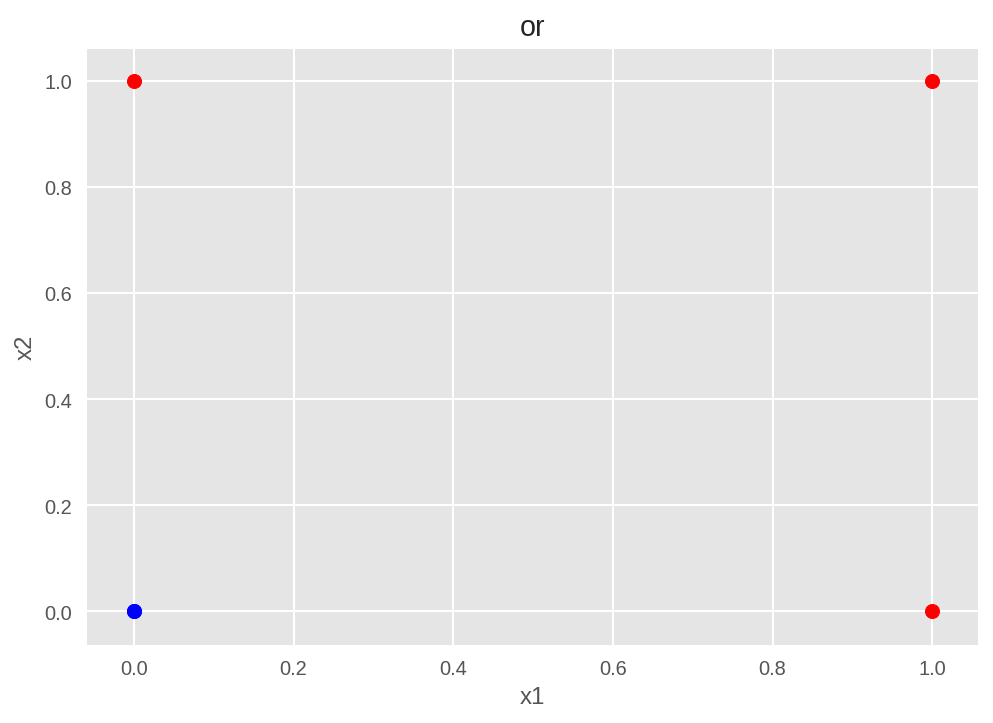

In [18]:
# Viz.
plt.scatter(x[1:,0], x[1:,1], c = "r")
plt.scatter(x[0,:], x[0,:], c = "b")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("or")
plt.show()

<h3>Solución</h3>

In [0]:
theta3 = np.array(np.random.rand(2)).reshape(-1, 1)

<h2>EJERCICIO 3</h2>
<p>Reemplazar los valores <strong>learning_rate</strong> y <strong>epochs</strong> hasta encontrar la mejor funcion que pueda predecir los datos del problema. Una vez que hayas corrido la siguiente celda, visualiza tus resultados con las siguientes dos celdas. Las cuales te mostraran el progreso de tu funcion costo y el resultado del aprendizaje comparado con los datos del problema. </p> 
<p><strong>NOTA:</strong> Te recomiendo probar con los siguientes rangos.</p>
<ol>
    <li><strong>Learning rate:</strong> 0.001 - 0.1</li>
    <li><strong>Epochs:</strong>10 - 1000</li>
</ol>

In [0]:
#@title Texto de título predeterminado
# NOTA: Reemplaza las siguientes variables.
learning_rate = # ESCRIBE AQUI TU VALOR
epochs = # ESCRIBE AQUI TU VALOR
# Entrena el algoritmo.
theta_trained3, hist_cf3 = bgd(theta = theta3, x = x, y = y, learning_rate = learning_rate, epochs = epochs)

[[0.79263732]
 [0.83089677]]


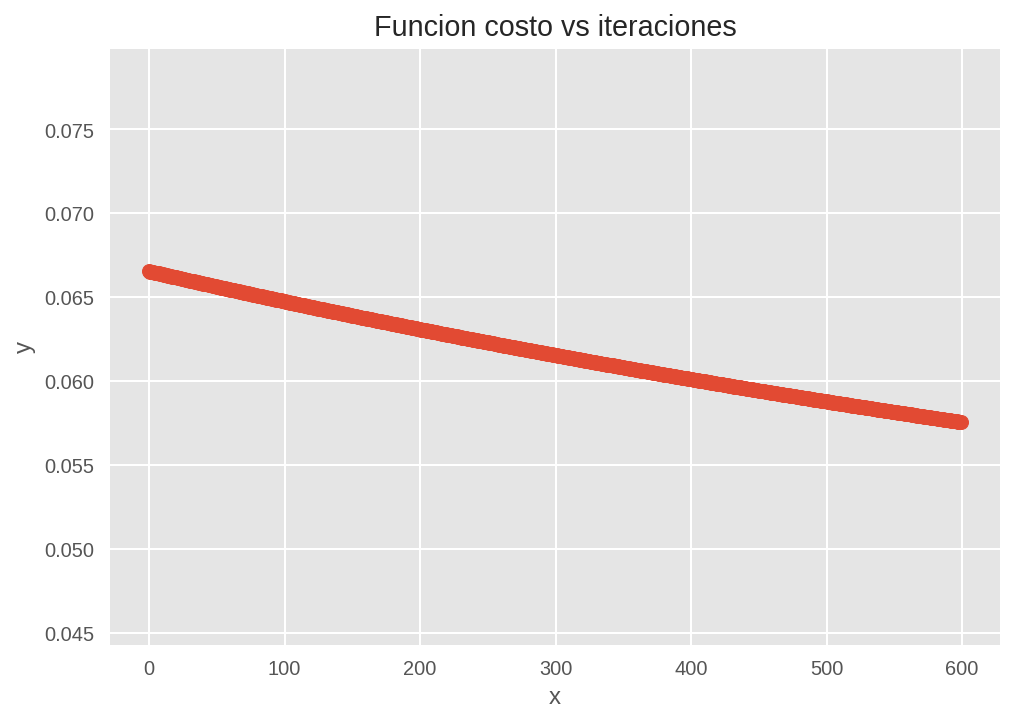

In [37]:
print(theta_trained3)
# Plot cost function history.
plt.scatter([i for i in range(len(hist_cf3))], hist_cf3)
plt.title("Funcion costo vs iteraciones")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<p>Con el fin de entender el resultado de la prediccion veamos los valores de salida con los parametros entrenados.</p>

In [38]:
# Prediccion de la curva segun la base de datos.
h_theta_x3 = np.dot(x, theta_trained3)
for i, k in zip(x, range(h_theta_x3.shape[0])):
    print("Para {},{} obtenemos: {}".format(i[0], i[1], h_theta_x3[k]))

Para 0,0 obtenemos: [0.]
Para 0,1 obtenemos: [0.83089677]
Para 1,0 obtenemos: [0.79263732]
Para 1,1 obtenemos: [1.62353409]


<p>Los resultados son continuos ... Nuestro problema require no solo valores discretos pero tambien division de regiones.</p>
<h3>Como lo solucionamos?</h3>
<p>Podemos definir un umbral de decision para nuestros valores. Al menos por ahora.</p>
<h2>EJERCICIO 4</h2>
<p>Define un umbral de decision con el fin de replicar los resultados de la funcion or. El objetivo es hacer que el ERROR reporte 0. Te recomiendo utilizar un valor entre 0-2. Comienza desde 2 y baja.</p>

In [39]:
# Variable.
umbral = # Escribe aqui tu valor.
# Predicciones
error = 0
h_theta_x3_umbral = [1 if i > umbral else 0 for i in h_theta_x3]
for i, k in zip(x, range(len(h_theta_x3_umbral))):
    print("Para {},{} obtenemos: {} y el valor real es {}".format(i[0], i[1], h_theta_x3_umbral[k], i[0] or i[1]))
    error += np.abs(h_theta_x3_umbral[k] - (i[0] or i[1]))
print("\nERROR: {}%".format(error*25))

Para 0,0 obtenemos: 0 y el valor real es 0
Para 0,1 obtenemos: 0 y el valor real es 1
Para 1,0 obtenemos: 0 y el valor real es 1
Para 1,1 obtenemos: 0 y el valor real es 1

ERROR: 75%


<p>Veamos la curva de regresion obtenida en el entrenamiento del algoritmo.</p>

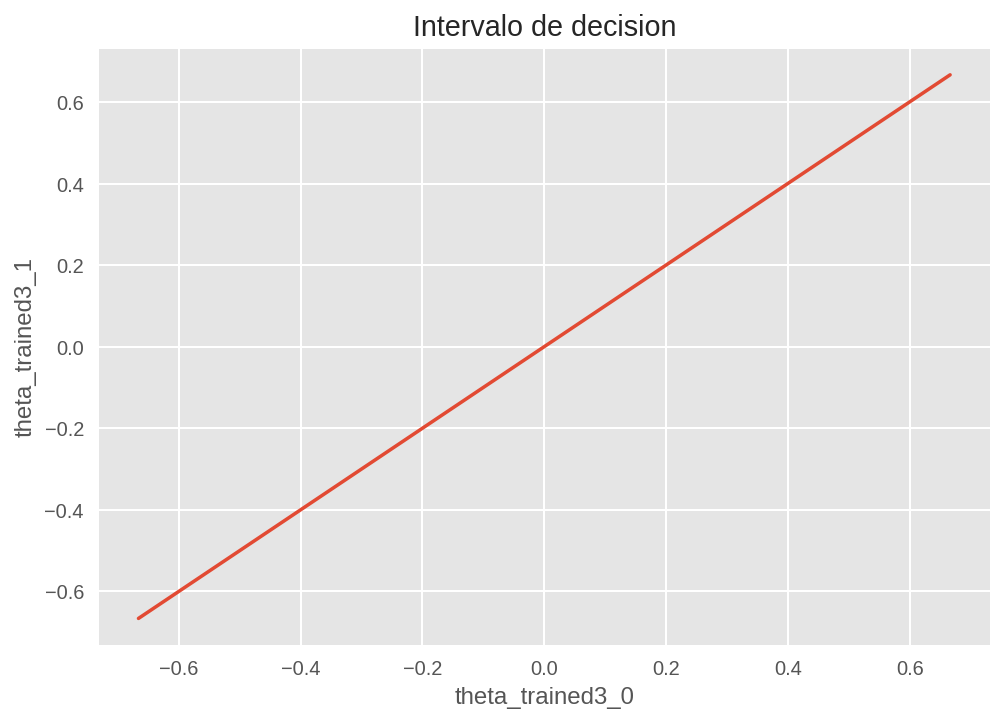

In [36]:
x_0 = np.arange(-1, 2)
y_0 = [i*theta_trained3[0] for i in x_0]
y_1 = [i*theta_trained3[1] for i in x_0]
plt.plot(y_0, y_1)
plt.title("Intervalo de decision")
plt.xlabel("theta_trained3_0")
plt.ylabel("theta_trained3_1")
plt.show()

<p> Como pudiste notar, al intentar resolver el problema utilizando algoritmos de regresion, tuvimos inconvenientes en el formato del algoritmo. Entonces, buscamos maneras de resolverlo utilizando algun truco sencillo. Sin embargo, en problemas reales como <strong>prediccion de cancer vs tamano del tumor</strong>, <strong>sentimiento de un comentario en facebook</strong>, <strong>reconocimiento de rostros en imagenes</strong>, etc. este metodo no funcionara. Por eso debemos escalar el algoritmo de prediccion a resolver un problema de <strong>CLASIFICACION</strong> en el cual las variables de salida son discretas.</p>